# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

# Get The Data

In [2]:
train_df = pd.read_csv('../input/car-crashes-severity-prediction/train.csv')
test_df = pd.read_csv('../input/car-crashes-severity-prediction/test.csv')
weather_df = pd.read_csv('../input/car-crashes-severity-prediction/weather-sfcsv.csv')

# Exploring data

In [3]:
pd.set_option('display.max_column', 100)
# train data
print("The shape of the train dataset is {}.\n\n".format(train_df.shape))
train_df.head()

The shape of the train dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


In [4]:
#test data
print("The shape of the test dataset is {}.\n\n".format(test_df.shape))
test_df.head()

The shape of the test dataset is (1601, 15).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58


In [5]:
# weather data
print("The shape of the weather dataset is {}.\n\n".format(weather_df.shape))
weather_df.head()

The shape of the weather dataset is (6901, 12).




,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.0,0.0,52.0,89.0,0.0,9.0,No


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6407 non-null   int64  
 1   Lat           6407 non-null   float64
 2   Lng           6407 non-null   float64
 3   Bump          6407 non-null   bool   
 4   Distance(mi)  6407 non-null   float64
 5   Crossing      6407 non-null   bool   
 6   Give_Way      6407 non-null   bool   
 7   Junction      6407 non-null   bool   
 8   No_Exit       6407 non-null   bool   
 9   Railway       6407 non-null   bool   
 10  Roundabout    6407 non-null   bool   
 11  Stop          6407 non-null   bool   
 12  Amenity       6407 non-null   bool   
 13  Side          6407 non-null   object 
 14  Severity      6407 non-null   int64  
 15  timestamp     6407 non-null   object 
dtypes: bool(9), float64(3), int64(2), object(2)
memory usage: 406.8+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1601 non-null   int64  
 1   Lat           1601 non-null   float64
 2   Lng           1601 non-null   float64
 3   Bump          1601 non-null   bool   
 4   Distance(mi)  1601 non-null   float64
 5   Crossing      1601 non-null   bool   
 6   Give_Way      1601 non-null   bool   
 7   Junction      1601 non-null   bool   
 8   No_Exit       1601 non-null   bool   
 9   Railway       1601 non-null   bool   
 10  Roundabout    1601 non-null   bool   
 11  Stop          1601 non-null   bool   
 12  Amenity       1601 non-null   bool   
 13  Side          1601 non-null   object 
 14  timestamp     1601 non-null   object 
dtypes: bool(9), float64(3), int64(1), object(2)
memory usage: 89.2+ KB


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6900 non-null   object 
 5   Wind_Chill(F)      3292 non-null   float64
 6   Precipitation(in)  3574 non-null   float64
 7   Temperature(F)     6899 non-null   float64
 8   Humidity(%)        6899 non-null   float64
 9   Wind_Speed(mph)    6556 non-null   float64
 10  Visibility(mi)     6900 non-null   float64
 11  Selected           6901 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 647.1+ KB


> no nulls in train and test data but there is many nulls in weather data

## Dropping duplicates in weather dataset

In [9]:
print('the shape of weather data before dropping duplicates : ', weather_df.shape)
weather_df = weather_df.drop_duplicates(['Year','Month','Day', 'Hour'], keep='last')
print('the shape of weather data after dropping duplicates : ', weather_df.shape)

the shape of weather data before dropping duplicates :  (6901, 12)
the shape of weather data after dropping duplicates :  (5972, 12)


## Fixing data type of timestamp

In [10]:
for df in [train_df, test_df] :
    df['timestamp'] = pd.to_datetime(df['timestamp'])


## expand timestamp 

In [11]:
for df in [train_df, test_df] :
    df['Year'] = df['timestamp'].dt.strftime('%Y').astype(int)
    df['Month'] = df['timestamp'].dt.strftime('%m').astype(int)
    df['Day'] = df['timestamp'].dt.strftime('%d').astype(int)
    df['Hour'] = df['timestamp'].dt.strftime('%H').astype(int)
    df['time'] = df['timestamp'].dt.strftime('%Y-%m-%d')


# Get holidays date as dataframe from hoidays xml

In [12]:
import xml.etree.ElementTree as Xet
  
cols = ["date"]
rows = []
  
# Parsing the XML file
xmlparse = Xet.parse('/kaggle/input/car-crashes-severity-prediction/holidays.xml')
root = xmlparse.getroot()
for i in root:
    date = i.find("date").text
    rows.append({"date": date })
    
    
holidays_df = pd.DataFrame(rows, columns=cols)
holidays_df.head()

,date
0,2012-01-02
1,2012-01-16
2,2012-02-20
3,2012-05-28
4,2012-07-04


# Adding holiday feature to train and test data

In [13]:
holiday_set = set(holidays_df['date'])
for df in [train_df, test_df] :    
    df['is_holiday'] = df['time'].isin(holiday_set).astype(int)
    

# Merging wheather data with test and train data

In [14]:
train_df = pd.merge(train_df, weather_df, left_on = ['Year', 'Month', 'Day', 'Hour'], right_on = ['Year', 'Month', 'Day', 'Hour'])
test_df = pd.merge(test_df, weather_df, left_on = ['Year', 'Month', 'Day', 'Hour'], right_on = ['Year', 'Month', 'Day', 'Hour'])

## showing the merged data

In [15]:
train_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp,Year,Month,Day,Hour,time,is_holiday,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02,2016,3,25,15,2016-03-25,0,Partly Cloudy,NaN,NaN,66.0,54.0,17.3,10.0,No
1,803,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:04:17,2016,3,25,15,2016-03-25,0,Partly Cloudy,NaN,NaN,66.0,54.0,17.3,10.0,No
2,4522,37.752320,-122.403030,False,0.306,False,False,False,False,False,False,False,False,R,2,2016-03-25 15:50:50,2016,3,25,15,2016-03-25,0,Partly Cloudy,NaN,NaN,66.0,54.0,17.3,10.0,No
3,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00,2020,5,5,19,2020-05-05,0,Mostly Cloudy,59.0,0.0,59.0,78.0,20.0,10.0,No
4,3174,37.719150,-122.448260,False,0.025,False,False,False,False,False,False,False,False,R,3,2020-05-05 19:32:12,2020,5,5,19,2020-05-05,0,Mostly Cloudy,59.0,0.0,59.0,78.0,20.0,10.0,No


In [16]:
test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp,Year,Month,Day,Hour,time,is_holiday,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31,2016,4,4,19,2016-04-04,0,Partly Cloudy,NaN,NaN,63.0,60.0,10.4,10.0,No
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00,2020,10,28,11,2020-10-28,0,Fair,65.0,0.0,65.0,56.0,5.0,9.0,No
2,6693,37.769585,-122.414182,False,0.316,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00,2020,10,28,11,2020-10-28,0,Fair,65.0,0.0,65.0,56.0,5.0,9.0,No
3,7194,37.769669,-122.416109,False,0.214,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00,2020,10,28,11,2020-10-28,0,Fair,65.0,0.0,65.0,56.0,5.0,9.0,No
4,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45,2019,9,9,7,2019-09-09,0,Mostly Cloudy,59.0,0.0,59.0,87.0,14.0,10.0,No


## Further Investigating New Data

In [17]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6407.0,3203.000000,1849.685919,0.000000,1601.500000,3203.000000,4804.500000,6406.000000
Lat,6407.0,37.765653,0.032555,37.609619,37.737096,37.768238,37.787813,37.825626
Lng,6407.0,-122.405990,0.028275,-122.510440,-122.412210,-122.404835,-122.392477,-122.349734
Distance(mi),6407.0,0.135189,0.396360,0.000000,0.000000,0.000000,0.041000,6.820000
Severity,6407.0,2.293429,0.521225,1.000000,2.000000,2.000000,3.000000,4.000000
Year,6407.0,2018.407835,1.375794,2016.000000,2017.000000,2019.000000,2020.000000,2020.000000
Month,6407.0,6.744498,3.568445,1.000000,4.000000,7.000000,10.000000,12.000000
Day,6407.0,15.656626,8.750849,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,6407.0,12.873888,5.824203,0.000000,8.000000,14.000000,17.000000,23.000000
is_holiday,6407.0,0.023100,0.150232,0.000000,0.000000,0.000000,0.000000,1.000000


In [18]:
boolean_columns = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Amenity', 'Side', 'Selected']
def col_values(data, col) :    
    return data[col].value_counts()
for col in boolean_columns :
    print('Column Name : ', col)
    print(col_values(train_df, col))
    print("====================")       

Column Name :  Bump
False    6407
Name: Bump, dtype: int64
Column Name :  Crossing
False    5879
True      528
Name: Crossing, dtype: int64
Column Name :  Give_Way
False    6404
True        3
Name: Give_Way, dtype: int64
Column Name :  Junction
False    4828
True     1579
Name: Junction, dtype: int64
Column Name :  No_Exit
False    6406
True        1
Name: No_Exit, dtype: int64
Column Name :  Railway
False    6237
True      170
Name: Railway, dtype: int64
Column Name :  Roundabout
False    6407
Name: Roundabout, dtype: int64
Column Name :  Stop
False    5781
True      626
Name: Stop, dtype: int64
Column Name :  Amenity
False    6169
True      238
Name: Amenity, dtype: int64
Column Name :  Side
R    6082
L     325
Name: Side, dtype: int64
Column Name :  Selected
No     6405
Yes       2
Name: Selected, dtype: int64


> columns [Bump, Give_Way, No_Exit, Roundabout, Selected] should be dropped as it has one unique value

In [19]:
train_df.isnull().sum()

ID                      0
Lat                     0
Lng                     0
Bump                    0
Distance(mi)            0
Crossing                0
Give_Way                0
Junction                0
No_Exit                 0
Railway                 0
Roundabout              0
Stop                    0
Amenity                 0
Side                    0
Severity                0
timestamp               0
Year                    0
Month                   0
Day                     0
Hour                    0
time                    0
is_holiday              0
Weather_Condition       1
Wind_Chill(F)        3133
Precipitation(in)    2883
Temperature(F)          2
Humidity(%)             2
Wind_Speed(mph)       306
Visibility(mi)          1
Selected                0
dtype: int64

In [20]:
test_df.isnull().sum()

ID                     0
Lat                    0
Lng                    0
Bump                   0
Distance(mi)           0
Crossing               0
Give_Way               0
Junction               0
No_Exit                0
Railway                0
Roundabout             0
Stop                   0
Amenity                0
Side                   0
timestamp              0
Year                   0
Month                  0
Day                    0
Hour                   0
time                   0
is_holiday             0
Weather_Condition      0
Wind_Chill(F)        783
Precipitation(in)    720
Temperature(F)         0
Humidity(%)            0
Wind_Speed(mph)       78
Visibility(mi)         0
Selected               0
dtype: int64

there is huge number of nulls in [Wind_Chill(F), Precipitation(in)] features so they will be dropped also

## Dropping some features

In [21]:
columns_2_drop = ['Bump', 'Give_Way', 'No_Exit', 'Roundabout', 'Wind_Chill(F)', 'Precipitation(in)', 'Selected', 'time', 'timestamp']
for df in [train_df, test_df] :
    df.drop(columns = columns_2_drop, axis = 1, inplace = True)

In [22]:
train_df['ID'].duplicated().sum()

0

## Correlation Matrix

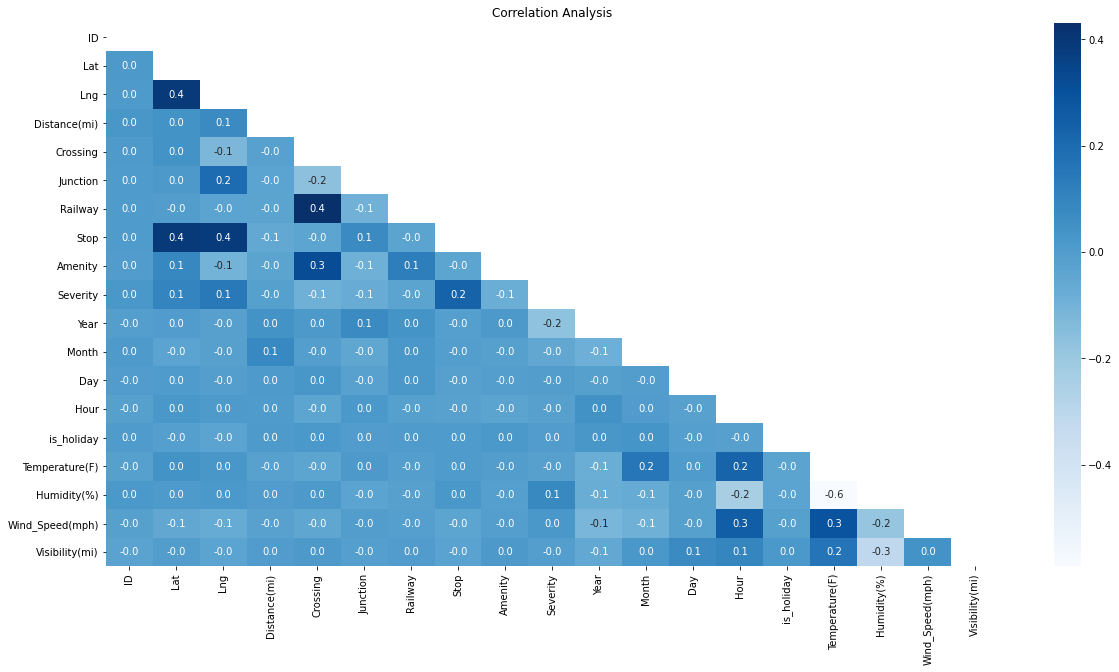

In [23]:
# correlation matrix and heatmap to stand on important features
corr_matrix = train_df.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, fmt = '0.1f', cmap = 'Blues', mask = mask, annot = True)
plt.title("Correlation Analysis");

In [24]:
corr_matrix['Severity']

ID                 0.020703
Lat                0.099581
Lng                0.145313
Distance(mi)      -0.013141
Crossing          -0.090314
Junction          -0.068328
Railway           -0.033322
Stop               0.229269
Amenity           -0.078915
Severity           1.000000
Year              -0.171479
Month             -0.049405
Day               -0.000495
Hour              -0.019022
is_holiday         0.003135
Temperature(F)    -0.019623
Humidity(%)        0.079902
Wind_Speed(mph)    0.021660
Visibility(mi)    -0.006691
Name: Severity, dtype: float64

In [25]:
'''plt.scatter(data = train_df, x = 'Temperature(F)', y = 'Humidity(%)')
plt.xlabel('Temperature(F)')
plt.ylabel('Humidity(%)')
plt.title('Temp VS Humidity');'''

"plt.scatter(data = train_df, x = 'Temperature(F)', y = 'Humidity(%)')\nplt.xlabel('Temperature(F)')\nplt.ylabel('Humidity(%)')\nplt.title('Temp VS Humidity');"

## Handling Missing Values

In [26]:
# imputing nan in Wind_Speed(mph) by a random sample
'''for df in [train_df, test_df] :  
    random_sample = df['Wind_Speed(mph)'].dropna().sample(df['Wind_Speed(mph)'].isnull().sum())
    random_sample.index = df[df['Wind_Speed(mph)'].isnull()].index
    df.loc[df['Wind_Speed(mph)'].isnull(), 'Wind_Speed(mph)'] = random_sample'''
for df in [train_df,test_df]:
    df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].dropna().mean(), inplace = True)
    
#train_df['Wind_Speed(mph)'].fillna(train_df['Wind_Speed(mph)'].dropna().mean(), inplace = True)
       

In [27]:
train_df.isnull().sum()

ID                   0
Lat                  0
Lng                  0
Distance(mi)         0
Crossing             0
Junction             0
Railway              0
Stop                 0
Amenity              0
Side                 0
Severity             0
Year                 0
Month                0
Day                  0
Hour                 0
is_holiday           0
Weather_Condition    1
Temperature(F)       2
Humidity(%)          2
Wind_Speed(mph)      0
Visibility(mi)       1
dtype: int64

In [28]:
# dropping some records with nulls
train_df.dropna(inplace = True)
train_df.isnull().sum()

ID                   0
Lat                  0
Lng                  0
Distance(mi)         0
Crossing             0
Junction             0
Railway              0
Stop                 0
Amenity              0
Side                 0
Severity             0
Year                 0
Month                0
Day                  0
Hour                 0
is_holiday           0
Weather_Condition    0
Temperature(F)       0
Humidity(%)          0
Wind_Speed(mph)      0
Visibility(mi)       0
dtype: int64

## Severity investigating

In [29]:
train_df['Severity'].value_counts()

2    4346
3    1853
1     129
4      77
Name: Severity, dtype: int64

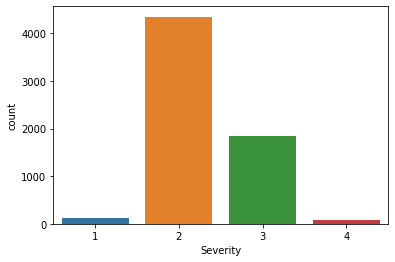

In [30]:
sns.countplot(data = train_df, x = 'Severity');

> so car crashes of severity 2 and 3 are the most common

## Location of car crashes

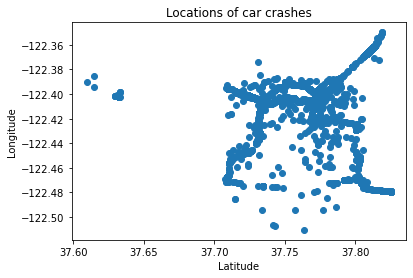

In [31]:
plt.scatter(data = train_df, x = 'Lat', y = 'Lng')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Locations of car crashes');

## Handling Outliers

In [32]:
#sns.boxplot(train_df['Distance(mi)'])
np.sum(train_df['Distance(mi)'] > 2)

84

(array([5290.,  439.,  298.,  128.,   37.,   36.,   11.,   28.,   28.,
          26.]),
 array([0.   , 0.199, 0.398, 0.597, 0.796, 0.995, 1.194, 1.393, 1.592,
        1.791, 1.99 ]),
 <BarContainer object of 10 artists>)

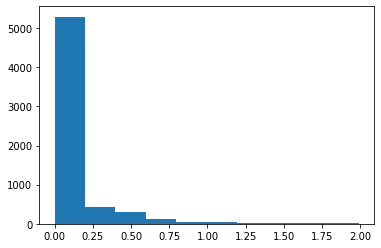

In [33]:
train_df = train_df[train_df['Distance(mi)'] < 2]
plt.hist(train_df['Distance(mi)'])

(array([   8.,   32.,    0.,    0.,  289., 1335.,  936., 1705.,  704.,
        1312.]),
 array([37.609619 , 37.6312197, 37.6528204, 37.6744211, 37.6960218,
        37.7176225, 37.7392232, 37.7608239, 37.7824246, 37.8040253,
        37.825626 ]),
 <BarContainer object of 10 artists>)

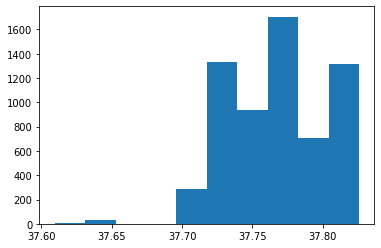

In [34]:
plt.hist(train_df['Lat'])

In [35]:
np.sum(train_df['Lat'] < 37.7)

40

In [36]:
train_df = train_df[train_df['Lat'] > 37.7]

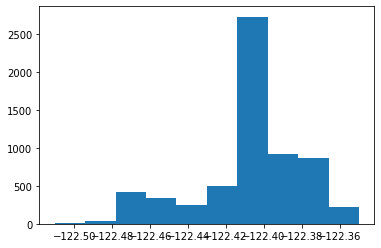

In [37]:
plt.hist(train_df['Lng']);

(array([  68.,  246., 1269., 1959., 1575.,  857.,  200.,   66.,   33.,
           8.]),
 array([36. , 42.2, 48.4, 54.6, 60.8, 67. , 73.2, 79.4, 85.6, 91.8, 98. ]),
 <BarContainer object of 10 artists>)

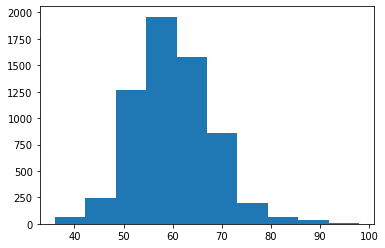

In [38]:
plt.hist(train_df['Temperature(F)'])

(array([  45.,   86.,  178.,  250.,  576., 1092., 1358., 1349., 1069.,
         278.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

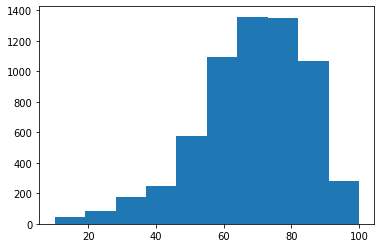

In [39]:
plt.hist(train_df['Humidity(%)'])

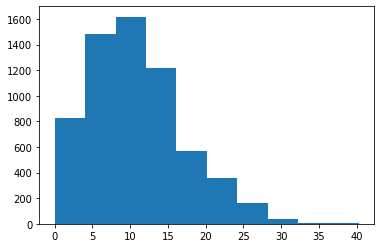

In [40]:
plt.hist(train_df['Wind_Speed(mph)']);

In [41]:
train_df.head()

,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,Year,Month,Day,Hour,is_holiday,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
0,0,37.762150,-122.405660,0.044,False,False,False,False,True,R,2,2016,3,25,15,0,Partly Cloudy,66.0,54.0,17.3,10.0
1,803,37.762150,-122.405660,0.044,False,False,False,False,True,R,2,2016,3,25,15,0,Partly Cloudy,66.0,54.0,17.3,10.0
2,4522,37.752320,-122.403030,0.306,False,False,False,False,False,R,2,2016,3,25,15,0,Partly Cloudy,66.0,54.0,17.3,10.0
3,1,37.719157,-122.448254,0.000,False,False,False,False,False,R,2,2020,5,5,19,0,Mostly Cloudy,59.0,78.0,20.0,10.0
4,3174,37.719150,-122.448260,0.025,False,False,False,False,False,R,3,2020,5,5,19,0,Mostly Cloudy,59.0,78.0,20.0,10.0


## Encoding Categorical Variables

In [42]:
'''weather_dict = {'Clear' : 1,'Fair':2,'Fair / Windy':2,'Mist':3,'Patches of Fog':4, 'Shallow Fog':5, 'Fog':6,'Fog / Windy':6, 'Scattered Clouds':7,'Smoke':8, 'Haze':8
      , 'Overcast':9, 'Cloudy':10, 'Cloudy / Windy':10, 'Partly Cloudy':11, 'Partly Cloudy / Windy':11,'Mostly Cloudy':12
      , 'Mostly Cloudy / Windy':12, 'Light Drizzle':13, 'Light Rain / Windy':14, 'Light Rain':14, 'Rain':15, 'Rain / Windy':15
      ,'Heavy Rain':16, 'Squalls':17, 'Light Thunderstorms and Rain':17}
for df in [train_df, test_df] :
    df['Weather_Condition'] = df['Weather_Condition'].map(weather_dict) 
   '''
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for df in [train_df, test_df] :
    df['Weather_Condition'] = label_encoder.fit_transform(df['Weather_Condition'])


In [43]:
idx = train_df['Weather_Condition'].value_counts().sort_values(ascending = True).index
idx

Int64Index([25,  6, 12, 19, 13,  9, 21,  2, 11, 24, 23,  5,  8, 18, 15,  7, 20,
             4, 10, 22,  1,  0, 16,  3, 14, 17],
           dtype='int64')

In [44]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)


## Polynomial Features

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree = 2, include_bias = False)
for df in [train_df, test_df] :
    location_data = df[['Lng', 'Lat']]
    train_poly = poly_feat.fit_transform(location_data)
    df['new_Lng'] = train_poly[:, 2]
    df['Lng_Lat'] = train_poly[:, 3]
    df['new_Lat'] = train_poly[:, 4]
test_df.head()

,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Year,Month,Day,Hour,is_holiday,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Side_L,Side_R,new_Lng,Lng_Lat,new_Lat
0,6407,37.786060,-122.390900,0.039,False,True,False,False,False,2016,4,4,19,0,14,63.0,60.0,10.4,10.0,0,1,14979.532403,-4624.669891,1427.786330
1,6408,37.769609,-122.415057,0.202,False,False,False,False,False,2020,10,28,11,0,3,65.0,56.0,5.0,9.0,0,1,14985.446180,-4623.568839,1426.543364
2,6693,37.769585,-122.414182,0.316,False,False,False,False,False,2020,10,28,11,0,3,65.0,56.0,5.0,9.0,0,1,14985.231955,-4623.532852,1426.541551
3,7194,37.769669,-122.416109,0.214,False,False,False,False,False,2020,10,28,11,0,3,65.0,56.0,5.0,9.0,0,1,14985.703743,-4623.615917,1426.547896
4,6409,37.807495,-122.476021,0.000,False,False,False,False,False,2019,9,9,7,0,11,59.0,87.0,14.0,10.0,0,1,15000.375720,-4630.511552,1429.406678


## Splitting Data

In [46]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42) # Try adding `stratify` here

X_train = train_data.drop(columns=['ID','Severity'])
y_train = train_data['Severity']

X_val = val_data.drop(columns=['ID','Severity'])
y_val = val_data['Severity']

## Data Is Ready For The Model

## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2,random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)

In [48]:
#print("The accuracy of the classifier on the training set is ", (classifier.score(X_train, y_train)))
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7390612569610183


## Submission File Generation

In [49]:
X_test = test_df.drop(columns=['ID'])

y_test_predicted = classifier.predict(X_test)

test_df['Severity'] = y_test_predicted

test_df.head()

,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Year,Month,Day,Hour,is_holiday,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Side_L,Side_R,new_Lng,Lng_Lat,new_Lat,Severity
0,6407,37.786060,-122.390900,0.039,False,True,False,False,False,2016,4,4,19,0,14,63.0,60.0,10.4,10.0,0,1,14979.532403,-4624.669891,1427.786330,2
1,6408,37.769609,-122.415057,0.202,False,False,False,False,False,2020,10,28,11,0,3,65.0,56.0,5.0,9.0,0,1,14985.446180,-4623.568839,1426.543364,2
2,6693,37.769585,-122.414182,0.316,False,False,False,False,False,2020,10,28,11,0,3,65.0,56.0,5.0,9.0,0,1,14985.231955,-4623.532852,1426.541551,2
3,7194,37.769669,-122.416109,0.214,False,False,False,False,False,2020,10,28,11,0,3,65.0,56.0,5.0,9.0,0,1,14985.703743,-4623.615917,1426.547896,2
4,6409,37.807495,-122.476021,0.000,False,False,False,False,False,2019,9,9,7,0,11,59.0,87.0,14.0,10.0,0,1,15000.375720,-4630.511552,1429.406678,2


In [50]:
test_df[['ID', 'Severity']].to_csv('/kaggle/working/submission.csv', index=False)